In [10]:
import json
import os

In [11]:
data = {}
for fname in os.listdir():
    name, ext = os.path.splitext(fname)
    if ext == ".json":
        fields = name.split('_')
        if fields[0] == 'constant':
            fields[1] = int(fields[1])
            fields[2] = int(fields[2])
            fields[3] = int(fields[3])
            fields[4] = int(fields[4])
            with open(fname, 'r') as f:
                data[tuple(fields[1:6])] = json.load(f)
print(list(data.keys()))

[(50, 3, 4, 3, 'wait'), (50, 3, 1, 2, 'wait'), (50, 3, 2, 1, 'estimate'), (50, 5, 2, 1, 'estimate'), (50, 7, 4, 2, 'wait'), (50, 7, 1, 3, 'wait'), (50, 9, 1, 2, 'wait'), (50, 9, 4, 3, 'wait'), (50, 5, 2, 1, 'wait'), (50, 9, 2, 1, 'estimate'), (50, 5, 1, 1, 'wait'), (50, 7, 2, 3, 'wait'), (50, 7, 8, 1, 'wait'), (50, 9, 2, 2, 'wait'), (50, 7, 8, 1, 'estimate'), (50, 9, 1, 1, 'estimate'), (50, 3, 1, 1, 'estimate'), (50, 5, 1, 1, 'estimate'), (50, 3, 2, 2, 'wait'), (50, 3, 4, 2, 'wait'), (50, 3, 1, 3, 'wait'), (50, 5, 8, 2, 'wait'), (50, 9, 1, 3, 'wait'), (50, 7, 1, 2, 'wait'), (50, 5, 4, 1, 'estimate'), (50, 9, 8, 1, 'wait'), (50, 9, 2, 3, 'wait'), (50, 7, 2, 2, 'wait'), (50, 3, 4, 1, 'estimate'), (50, 5, 4, 1, 'wait'), (50, 3, 2, 3, 'wait'), (50, 9, 4, 1, 'estimate'), (50, 3, 8, 1, 'wait'), (50, 5, 8, 1, 'wait'), (50, 5, 2, 3, 'wait'), (50, 9, 4, 1, 'wait'), (50, 7, 1, 1, 'wait'), (50, 7, 2, 1, 'estimate'), (50, 3, 4, 1, 'wait'), (50, 3, 8, 2, 'wait'), (50, 9, 8, 1, 'estimate'), (50, 7, 

In [3]:
import matplotlib.pyplot as plt
%matplotlib qt

In [12]:
packages_over_time = {}
for k,v in data.items():
    packages_over_time[k] = []
    for i in range(len(v)-1):
        packages_over_time[k].append(v[i+1]['number_of_packages'] - (v[i]['number_of_packages'] - len(v[i]['delivered_packages']['days_taken'])))

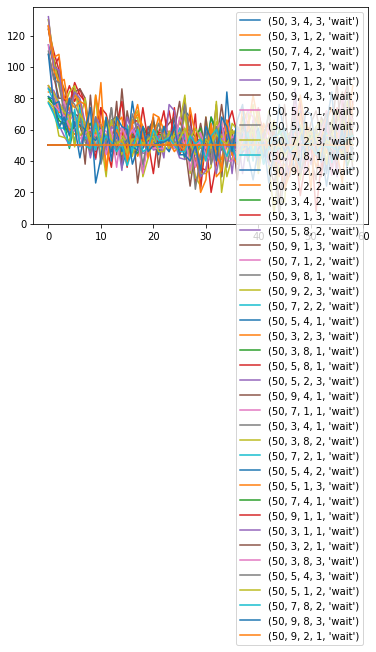

In [6]:
plt.cla()
for k,v in packages_over_time.items():
    if k[4] == 'wait':
        plt.plot(v, label=str(k))
plt.legend()
plt.show()

In [13]:
packages_over_time = {}
for k,v in data.items():
    packages_over_time[k] = [len(d['delivered_packages']['days_taken']) for d in v]

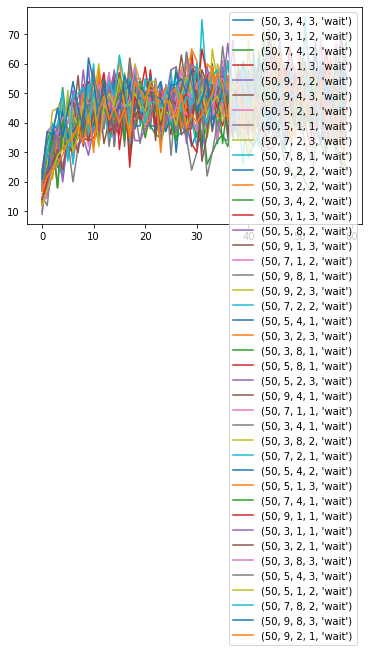

In [8]:
plt.cla()
for k,v in packages_over_time.items():
    if k[4] == 'wait':
        plt.plot(v, label=str(k))
plt.legend()
plt.show()

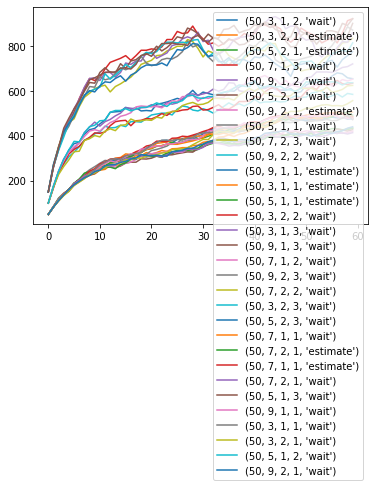

In [9]:
packages_over_time = {}
for k,v in data.items():
    packages_over_time[k] = [d['number_of_packages'] for d in v]
plt.cla()
for k,v in packages_over_time.items():
    if k[2] < 4:
        plt.plot(v, label=str(k))
plt.legend()
plt.show()